In [1]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import pysplit
import geopandas as gpd

In [2]:
from __future__ import division


#### mute print otherwise too much print will cause the program to crash

In [3]:
import sys
sys.stdout = open('output.txt', 'w')

#### Create a dataframe including the position and time of the backward trajectory you want to run (the following takes Southern University of Science and Technology as an example

In [3]:
import pandas as pd

data = {
    'year': [2011] * 10,
    'month': [6] * 10,
    'day': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
    'lat': [22.4] * 10,
    'lon': [114] * 10
}

df = pd.DataFrame(data)

In [10]:
df

,year,month,day,lat,lon
0,2011,6,10,22.4,114
1,2011,6,11,22.4,114
2,2011,6,12,22.4,114
3,2011,6,13,22.4,114
4,2011,6,14,22.4,114
5,2011,6,15,22.4,114
6,2011,6,16,22.4,114
7,2011,6,17,22.4,114
8,2011,6,18,22.4,114
9,2011,6,19,22.4,114


In [11]:
year = df['year']
month = df['month']
day = df['day']
lat = df['lat']
lon = df['lon']

In [8]:
working_dir = r'/Users/gong/hysplit/working'
output_dir = r'/Users/gong/trajectories/sustech'
meteo_dir = r'/Users/gong/mete'

for i in range(0,10):
    pysplit.generate_bulktraj(basename = str(lat[i])+str(lon[i]), 
                              hysplit_working = working_dir,
                              output_dir = output_dir, 
                              meteo_dir = meteo_dir,
                              years = [year[i]],
                              months = [month[i]],
                              hours = list(range(0,24)),  
                              altitudes = [5000], 
                              coordinates = (lat[i], lon[i]), 
                              run = -216,
                              monthslice = slice(day[i],(day[i]+1)),
                              meteo_bookends=([1], [1]),
                              get_clipped=False, 
                              get_reverse=False,
                              meteoyr_2digits=False,
                              outputyr_2digits=False,
                              hysplit = r'/Users/gong/hysplit/exec/hyts_std')

#### Merge all resulting trajectories into one file --> 'clusgroup'

In [4]:
trajgroup = pysplit.make_trajectorygroup(r'/Users/gong/trajectories/sustech/*jun5000*')
print("number of 5000-m jun trajectories:",trajgroup.trajcount)

number of 5000-m jun trajectories: 240


#### Check if the output of the first trace is correct

In [5]:
trajgroup.trajectories[0].data

,Timestep,Pressure,Rainfall,Relative_Humidity,Specific_Humidity,Mixing_Ratio,Terrain_Altitude,Solar_Radiation,geometry,DateTime,Temperature_C,Temperature,Mixing_Depth
Timestep,,,,,,,,,,,,,
0.0,0.0,546.5,0.2,63.0,4.5,4.5,150.2,545.2,POINT Z (114.00000 22.40000 5000.00000),2011-06-11 00:00:00,None,None,None
-1.0,-1.0,547.4,0.2,61.6,4.5,4.5,149.0,314.5,POINT Z (114.02600 22.41500 4982.40000),2011-06-10 23:00:00,None,None,None
-2.0,-2.0,548.9,0.2,60.3,4.4,4.5,147.7,70.0,POINT Z (114.05300 22.43000 4959.10000),2011-06-10 22:00:00,None,None,None
-3.0,-3.0,550.8,0.2,59.2,4.4,4.4,146.3,0.0,POINT Z (114.08100 22.44600 4929.90000),2011-06-10 21:00:00,None,None,None
-4.0,-4.0,553.1,0.2,58.2,4.4,4.4,144.6,0.0,POINT Z (114.11100 22.46000 4894.40000),2011-06-10 20:00:00,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
-212.0,-212.0,280.5,0.0,26.0,0.2,0.2,308.0,1098.1,POINT Z (113.18700 23.48400 9910.10000),2011-06-02 04:00:00,None,None,None
-213.0,-213.0,279.8,0.0,26.1,0.2,0.2,331.9,1037.8,POINT Z (112.83500 23.57200 9900.00000),2011-06-02 03:00:00,None,None,None
-214.0,-214.0,279.3,0.0,26.3,0.2,0.2,352.3,915.4,POINT Z (112.48500 23.66900 9886.50000),2011-06-02 02:00:00,None,None,None


#### plot the data that you want with basemap

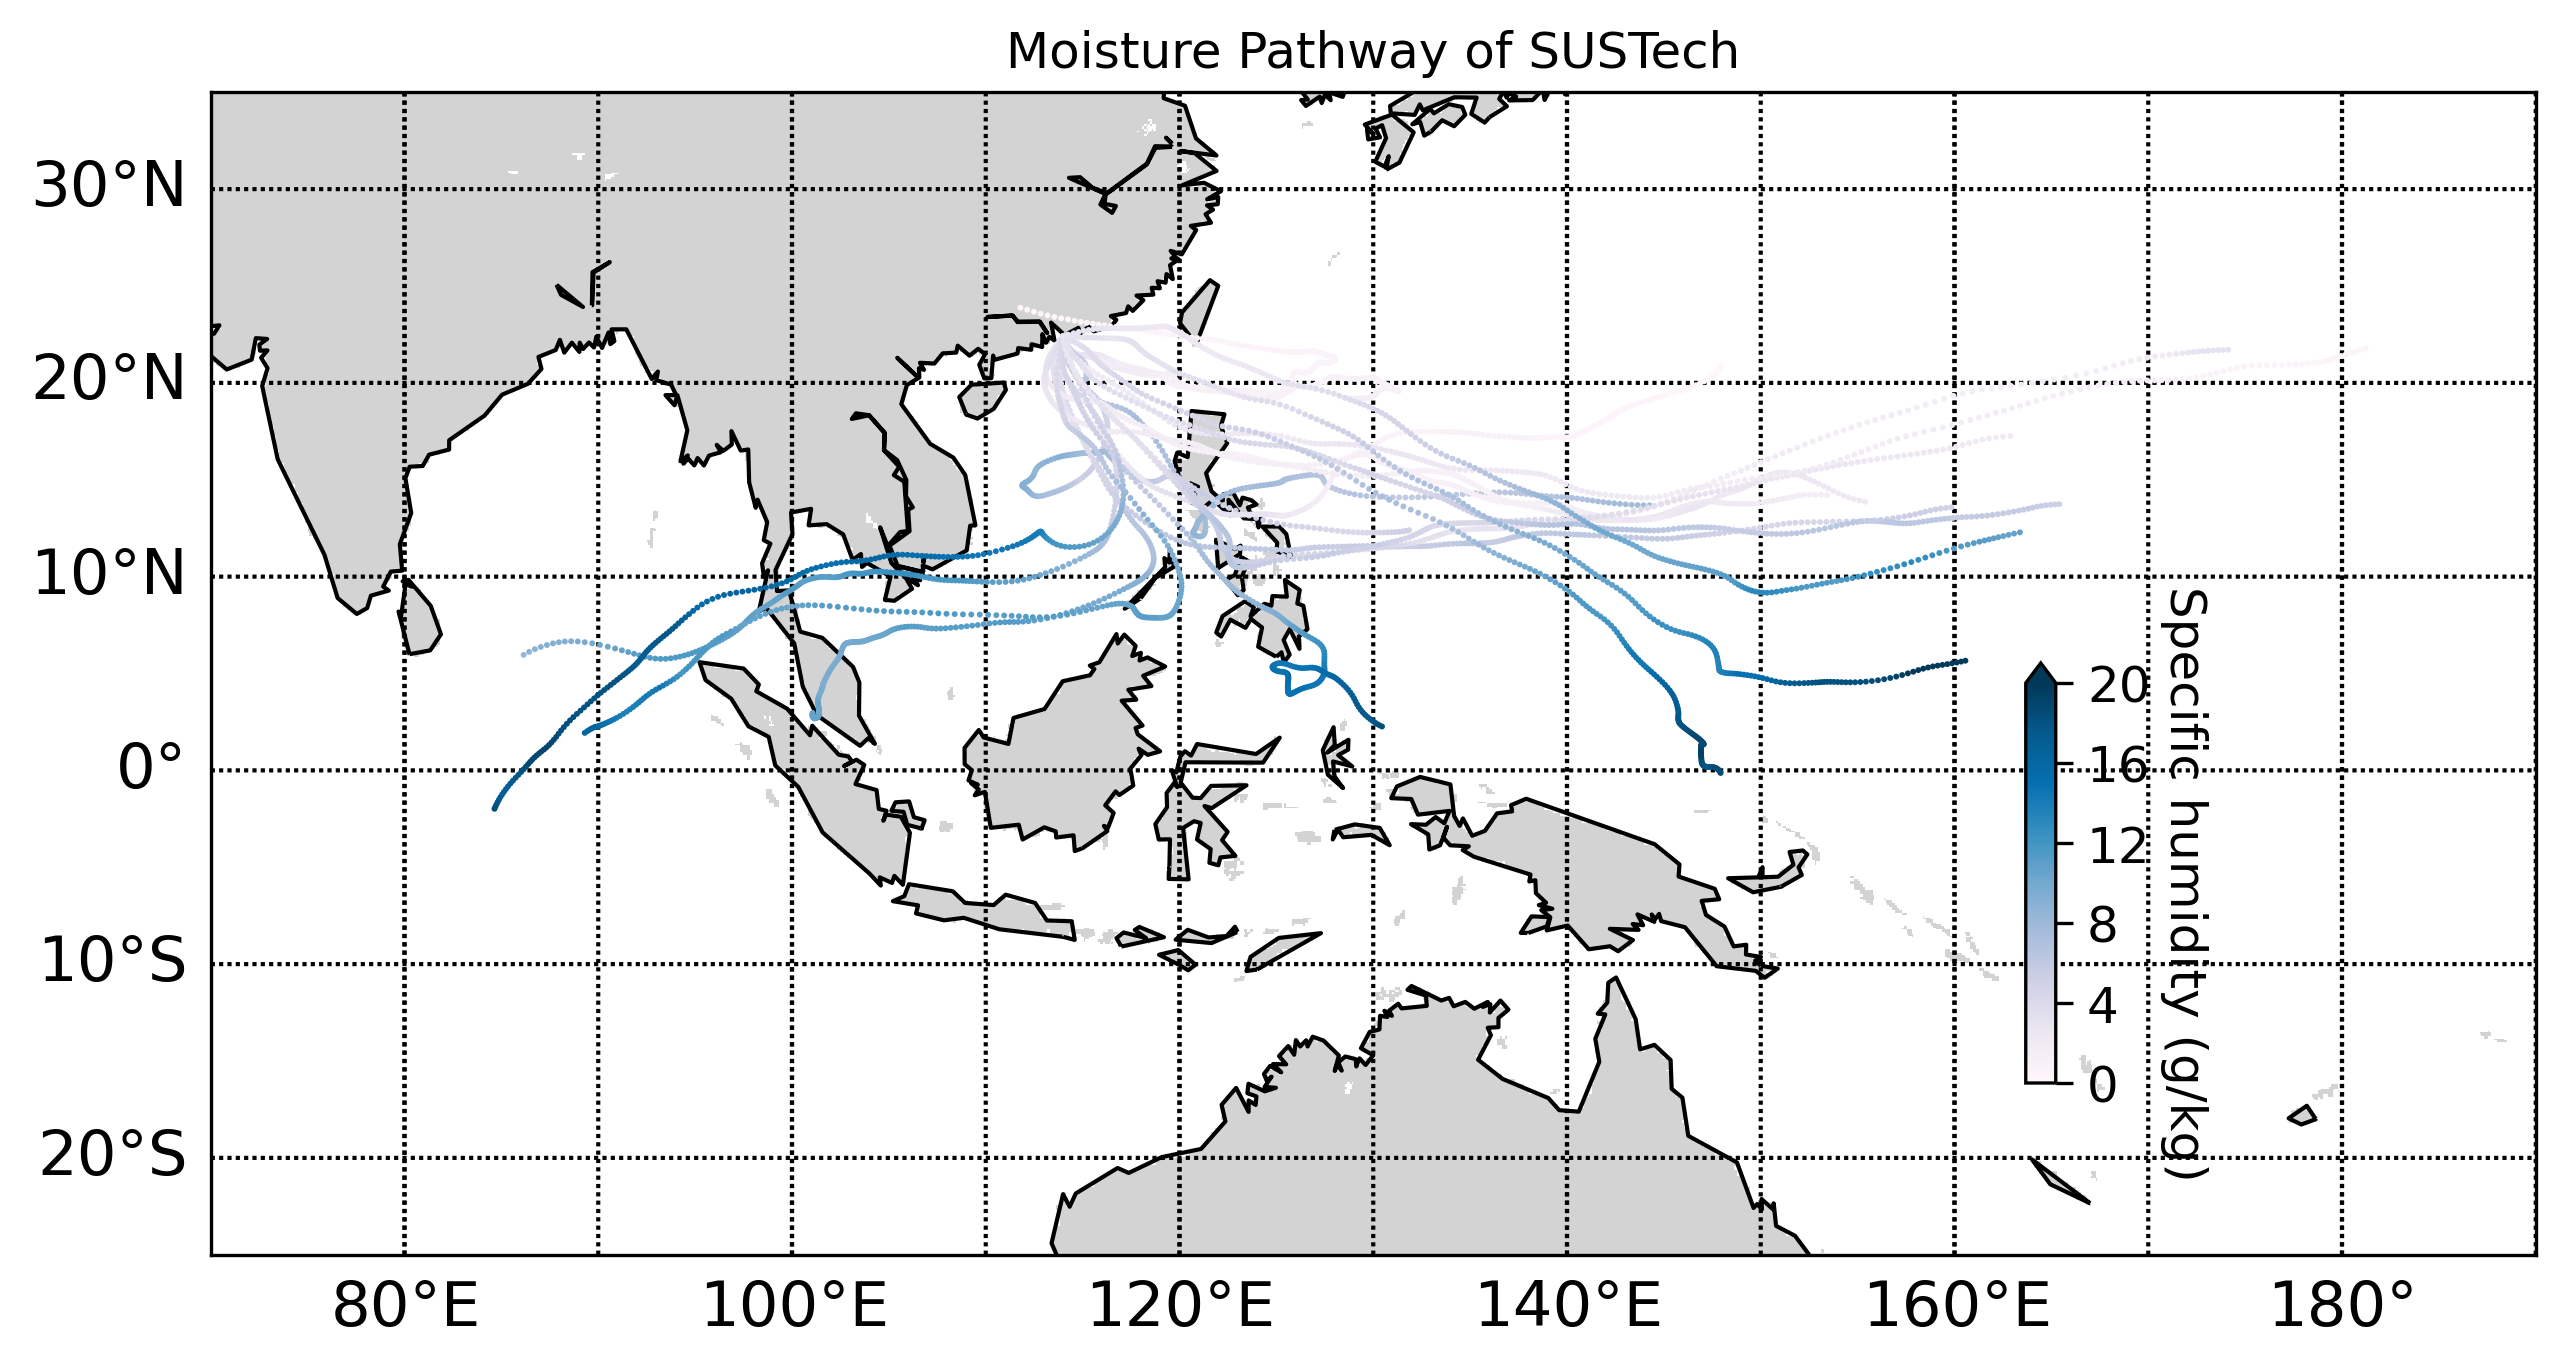

In [6]:
mapcorners = [70, -25, 190, 35]
standard_pm = None
fig, ax = plt.subplots(figsize=(10,7),dpi=300)

bmap_params = pysplit.MapDesign(mapcorners, 
                                standard_pm, 
                                projection = 'cyl',
                                mapcolor = None, 
                                latlon_spacing = (10,10),
                                latlon_labelspacing=(10,20),
                                lon_labels=["bottom"], 
                                latlon_fs=15,
                                drawoutlines=False,resolution="c",
                                )

bmap = bmap_params.make_basemap(ax=ax)
bmap.drawlsmask(land_color = "#d3d3d3", ocean_color="white",)
bmap.drawcoastlines()
plt.title('Moisture Pathway of SUSTech')
for traj in trajgroup[::12]:

    mappable = pysplit.traj_scatter(
        traj.data.Specific_Humidity	.astype(np.float64).values,
        traj.data.geometry.apply(lambda p: p.x).values,
        traj.data.geometry.apply(lambda p: p.y).values,
        bmap, colormap=plt.cm.PuBu,size=2,
        vmin=0, vmax=20, suppress_printmsg=False)


cax_position = [0.73, 0.3, 0.01, 0.2]
cax, cbar = pysplit.make_cax_cbar(fig, 
                                  cax_position, 
                                  mappable, 
                                  orientation='vertical',
                                  cbar_label='Specific humidity (g/kg)',
                                  extend='max')
cbar.ax.tick_params(axis='both', which='both', width=0.8, labelsize=12)
cbar.set_label('Specific humidity (g/kg)', rotation=270, va='center',fontsize = 12, labelpad=8)

plt.show()


#### Different styles of projection

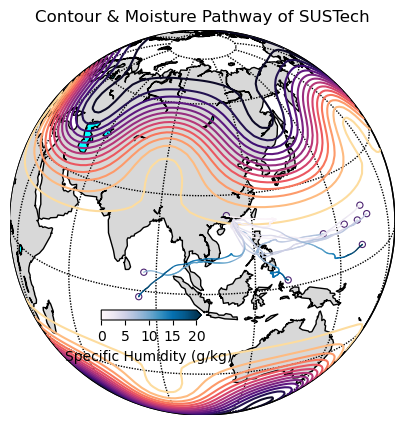

In [7]:
# make some data
nlats = 73; nlons = 145; delta = 2.*np.pi/(nlons-1)
lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
lons = (delta*np.indices((nlats,nlons))[1,:,:])
wave = 0.75*(np.sin(2.*lats)**8*np.cos(4.*lons))
mean = 0.5*np.cos(2.*lats)*((np.sin(2.*lats))**2 + 2.)


# plot
fig, ax = plt.subplots(figsize=(5,5),dpi=100)
map = Basemap(projection='ortho', lat_0=22, lon_0=104, resolution='c',ax=ax)
map.drawcoastlines(linewidth=1)
map.fillcontinents(color='#d8d8d8', lake_color='aqua')
map.drawmapboundary(fill_color='#FFFFFF')
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))
x, y = map(lons*180./np.pi, lats*180./np.pi)
cs = map.contour(x,y,wave+mean,15,linewidths=1.5,cmap='magma')

plt.title('Contour & Moisture Pathway of SUSTech')
# Add trajectories to the map
for traj in trajgroup[::24]:
    mappable= pysplit.traj_scatter(
              traj.data.Specific_Humidity.astype(np.float64).values,
              traj.data.geometry.apply(lambda p: p.x).values,
              traj.data.geometry.apply(lambda p: p.y).values,
              map, colormap=plt.cm.PuBu, size=1,
              vmin=0, vmax=20, suppress_printmsg=False)

    last_point = traj.data.geometry.iloc[-1]
    x_last, y_last = map(last_point.x, last_point.y)
    map.scatter(x_last, y_last, marker='o', s=20, facecolor='none', edgecolor='#4c2371', lw=0.8, label='Moisture Source')

# add colorbar
cax = fig.add_axes([0.31, 0.30, 0.2, 0.02])
cbar = plt.colorbar(mappable, cax=cax, orientation='horizontal',extend='max')
cbar.set_label('Specific Humidity (g/kg)')
cbar.set_ticks([0, 5, 10, 15, 20])

if __name__ == "__main__":
    plt.show()

#### The latitude and longitude information of cluster1 after clustering.

In [8]:
from SOM_ import SOM as mySOM

In [9]:
trajectory_data = []
j = 240      # how much traj you has been run
for i in range(j): 
    lon = trajgroup.trajectories[i].path.xy[0]
    lat = trajgroup.trajectories[i].path.xy[1]
    trajectory_data.append(np.array([lon, lat]))

trajectory_array = np.array(trajectory_data)
trajectory_array_reshaped = np.swapaxes(trajectory_array, 1, 2)



In [10]:
trajectory_array_reshaped.shape

(240, 217, 2)

In [11]:
trajectory_array_reshaped.reshape(240, -1)
som = mySOM(m=3,  # how many cluster you want 
            n=1,
            dim=434)  # the values you want to cluster
som.fit(trajectory_array_reshaped.reshape(j, -1))
predictions = som.predict(trajectory_array_reshaped.reshape(j, -1))

cluster_0_trajectories = trajectory_array_reshaped[predictions == 0]
cluster_1_trajectories = trajectory_array_reshaped[predictions == 1]
cluster_2_trajectories = trajectory_array_reshaped[predictions == 2]

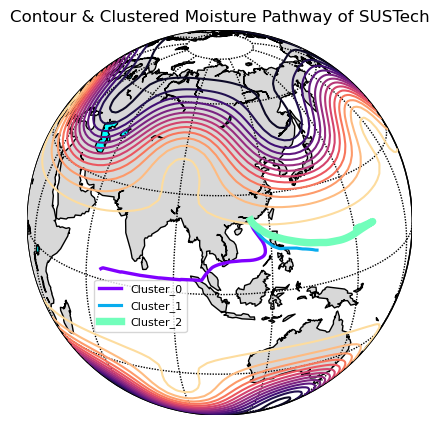

In [12]:
colors = np.linspace(0, 0.95, 5)

# make some data
nlats = 73; nlons = 145; delta = 2.*np.pi/(nlons-1)
lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
lons = (delta*np.indices((nlats,nlons))[1,:,:])
wave = 0.75*(np.sin(2.*lats)**8*np.cos(4.*lons))
mean = 0.5*np.cos(2.*lats)*((np.sin(2.*lats))**2 + 2.)
x, y = map(lons*180./np.pi, lats*180./np.pi)

# plot
fig, ax = plt.subplots(figsize=(5,5),dpi=100)
map = Basemap(projection='ortho', lat_0=22, lon_0=104, resolution='c',ax=ax)
map.drawcoastlines(linewidth=1)
map.fillcontinents(color='#d8d8d8', lake_color='aqua')
map.drawmapboundary(fill_color='#FFFFFF')
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))
cs = map.contour(x,y,wave+mean,15,linewidths=1.5,cmap='magma')

plt.title('Contour & Clustered Moisture Pathway of SUSTech')

# Loop over clusters and plot trajectories
for i, cluster_trajectories in enumerate([cluster_0_trajectories, 
                                          cluster_1_trajectories, 
                                          cluster_2_trajectories,]):
    params = {'zorder' : 24,
              'latlon' : True,
              'c' : plt.cm.rainbow(colors[i]),
              'label': f'Cluster_{i}'}
    loca = np.nanmean(cluster_trajectories, axis=0)
    map.plot(loca[:, 0], loca[:, 1], lw=(cluster_trajectories.shape[0]/j)*10, **params)

# Add legend
plt.legend(bbox_to_anchor=(0.16, 0.20), loc=3, prop={'size': 8})

if __name__ == "__main__":
    plt.show()


#### extract the specific humidity data

In [13]:

traj_sp = np.empty((240, 217))

for i in range(240):
    specific_humidity_values = trajgroup.trajectories[i].data['Specific_Humidity'].values
    traj_sp[i, :] = specific_humidity_values
traj_sp_reshaped = traj_sp[:, :, np.newaxis]

In [14]:
traj_loc_sp = np.concatenate((trajectory_array_reshaped, traj_sp_reshaped), axis=2)

#### PSCF (Potential Source Contribution Factor)

In [15]:
domain_n = np.zeros((61,131))
domain_m = np.zeros((61,131))
lat_largescale= list(np.linspace(40,-20,61))
lon_largescale= list(np.linspace(70,200,131))
pscf_domain_n= xr.DataArray(domain_n, coords=[lat_largescale, lon_largescale], dims=['lat','lon']) 
pscf_domain_m= xr.DataArray(domain_m, coords=[lat_largescale, lon_largescale], dims=['lat','lon']) 

for i in range(240):
    # calculate how much the traj point in specific grid
    for j in range(217):
        pscf_loc_n=pscf_domain_n.sel(lat=traj_loc_sp[i][j][1],lon=traj_loc_sp[i][j][0],method='nearest')
        lat_pscf_n=lat_largescale.index(pscf_loc_n.lat.values)
        lon_pscf_n=lon_largescale.index(pscf_loc_n.lon.values)
        domain_n[lat_pscf_n][lon_pscf_n]=domain_n[lat_pscf_n][lon_pscf_n]+1
        
        
        # calculate how much the traj point in specific grid of (last_traj -> path_traj) 
        if traj_loc_sp[i][j][2] > traj_loc_sp[i][216][2]:
            pscf_loc_m=pscf_domain_m.sel(lat=traj_loc_sp[i][j][1],lon=traj_loc_sp[i][j][0],method='nearest')
            lat_pscf_m=lat_largescale.index(pscf_loc_m.lat.values)
            lon_pscf_m=lon_largescale.index(pscf_loc_m.lon.values)
            domain_m[lat_pscf_m][lon_pscf_m]=domain_m[lat_pscf_m][lon_pscf_m]+1


In [16]:
pscf_sustech = domain_m/domain_n

/var/folders/nd/hy_zk7fs0yg61lbc_rx_10kc0000gn/T/ipykernel_56142/1482501151.py:1: RuntimeWarning: invalid value encountered in divide
  pscf_sustech = domain_m/domain_n


#### WPSCF (Weighted Potential Source Contribution Factor)

In [17]:
import numpy as np

condition_1 = domain_n > 80
condition_2 = (20 < domain_n) & (domain_n <= 80)
condition_3 = (10 < domain_n) & (domain_n <= 20)
condition_4 = domain_n <= 10

pscf_sustech[condition_1] *= 1.0
pscf_sustech[condition_2] *= 0.7
pscf_sustech[condition_3] *= 0.42
pscf_sustech[condition_4] *= 0.05

In [18]:
wpscf_sustech = xr.DataArray(pscf_sustech, coords=[lat_largescale,lon_largescale], dims=['lat','lon']) 

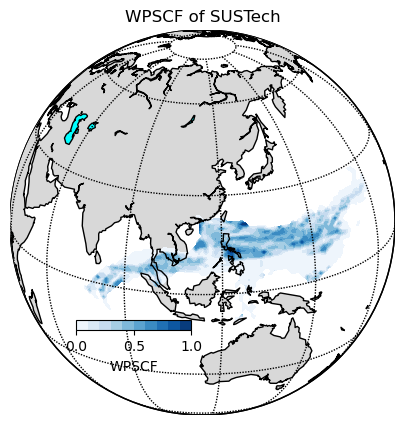

In [31]:
# Generate some sample data for demonstration
lons, lats = np.meshgrid(wpscf_sustech.lon.values, wpscf_sustech.lat.values)
data = wpscf_sustech.values

# Plotting contourf
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)

map = Basemap(projection='ortho', lat_0=22, lon_0=114, resolution='c', ax=ax)
map.drawcoastlines(linewidth=1)
map.fillcontinents(color='#d8d8d8', lake_color='aqua')
map.drawmapboundary(fill_color='#FFFFFF')
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))
plt.title('WPSCF of SUSTech')

# Contour plot
contour_plot = map.contourf(lons, lats, data, cmap='Blues',latlon=True,levels=np.linspace(0,1,11))

# Add colorbar
cax = fig.add_axes([0.26, 0.28, 0.23, 0.02])
cbar = plt.colorbar(contour_plot, cax=cax, orientation='horizontal', extend='max')
cbar.set_label('WPSCF')
cbar.set_ticks([0,0.5,1.0])


# Show the plot
plt.show()


#### CWT (Concentration weighted trajectory)